In [1]:
import yfinance as yf
import riskfolio as rf
import pandas as pd
import seaborn as sns
import numpy as np
import streamlit as slt
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ignore unwanted warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
tickers = ["WBD","BCC","SOLV","PFE","OXY","PG","T","TJX","MMM","BA","O","KMI","CSCO","CVS","DIS","MA","RTX","AXP","BX"]
years_delta = 1
end_date = datetime.today()
start_date = end_date - timedelta(days =  years_delta * 365)

In [3]:
adj_close_df = pd.DataFrame()
perc_change_df = pd.DataFrame()

for scrip in tickers:
    data = yf.download(scrip, start = start_date, end = end_date)
    adj_close_df[scrip] = data['Adj Close']
    perc_change_df[scrip] = data['Adj Close'].pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [8]:
cumulative_returns = cumulative_returns.dropna()
cumulative_returns.head()

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,O,KMI,CSCO,CVS,DIS,MA,RTX,AXP,BX
Date,,,,,,,,,,,,,,,,,,,
2024-04-02,-0.142568,0.489648,-0.031838,-0.035039,0.099155,0.059846,0.142862,0.095121,0.236997,-0.080669,0.084810,0.133479,-0.047596,0.098680,0.377687,0.217664,0.218213,0.465975,0.302287
2024-04-03,-0.117290,0.509250,-0.075398,-0.046597,0.106508,0.030671,0.148734,0.071010,0.241661,-0.095923,0.082759,0.141479,-0.051875,0.110289,0.334613,0.212559,0.205852,0.473125,0.304967
2024-04-04,-0.146613,0.491648,-0.030391,-0.066562,0.105201,0.026051,0.146124,0.054165,0.206352,-0.103892,0.079681,0.134095,-0.064130,0.099871,0.313412,0.193129,0.227608,0.431787,0.299194
2024-04-05,-0.158746,0.520051,0.013893,-0.066212,0.131675,0.030341,0.136339,0.065835,0.212881,-0.104625,0.087683,0.135941,-0.055571,0.109991,0.327882,0.211873,0.257028,0.450500,0.315381
2024-04-08,-0.138524,0.524451,-0.030246,-0.069014,0.123177,0.029945,0.125250,0.059450,0.224873,-0.112350,0.100610,0.129787,-0.061601,0.107908,0.316329,0.217875,0.259376,0.461258,0.333321


In [9]:
mean_portfolio_cumilative_return.head()

Date
2023-11-13         NaN
2023-11-14    0.020498
2023-11-15    0.026877
2023-11-16    0.016864
2023-11-17    0.023053
dtype: float64

In [10]:
cumulative_returns = ( perc_change_df + 1 ).cumprod() - 1

# mean returns of portfolio along the rows
mean_portfolio_cumilative_return = cumulative_returns.mean(axis = 1)

In [11]:
benchmark = yf.download("^GSPC", start=start_date)['Adj Close']
bmark_perc_return = benchmark.pct_change()
bmark_deviation =  ( bmark_perc_return + 1 ).cumprod() - 1
bmark_deviation

[*********************100%%**********************]  1 of 1 completed


Date
2023-11-13         NaN
2023-11-14    0.019075
2023-11-15    0.020702
2023-11-16    0.021918
2023-11-17    0.023228
                ...   
2024-11-06    0.343981
2024-11-07    0.353969
2024-11-08    0.359055
2024-11-11    0.360372
2024-11-12    0.355628
Name: Adj Close, Length: 252, dtype: float64

In [12]:
weights = ( np.ones( len(cumulative_returns.cov())) / len(cumulative_returns.cov()) )

portfolio_std_dev = (weights.dot(cumulative_returns.cov()).dot(weights)) ** 0.5

In [13]:
weights

array([0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
       0.05263158, 0.05263158, 0.05263158, 0.05263158])

In [14]:
portfolio_std_dev

0.06714960088382357

In [15]:
cumulative_returns.cov()

,WBD,BCC,SOLV,PFE,OXY,PG,T,TJX,MMM,BA,O,KMI,CSCO,CVS,DIS,MA,RTX,AXP,BX
WBD,0.018795,-0.005188,0.001762,-0.001623,-0.000294,-0.007277,-0.011692,-0.011008,-0.022786,0.016386,-0.004095,-0.013684,-0.000019,0.011024,-0.002267,-0.005973,-0.019224,-0.022660,-0.009269
BCC,-0.005188,0.012413,0.007099,-0.000218,-0.000540,0.002812,0.007164,0.004593,0.012092,-0.008482,0.003183,0.008152,0.003073,0.000001,0.004518,0.006193,0.010950,0.014990,0.011737
SOLV,0.001762,0.007099,0.010284,0.000205,-0.004909,0.000887,0.007987,0.001372,0.012121,-0.004775,0.005154,0.008451,0.005448,0.000986,0.000195,0.005519,0.007442,0.008120,0.013227
PFE,-0.001623,-0.000218,0.000205,0.002355,-0.001833,0.001507,0.004187,0.003263,0.008782,-0.001944,0.002873,0.004402,0.000520,-0.002969,-0.003141,0.000448,0.004598,0.003813,0.003296
OXY,-0.000294,-0.000540,-0.004909,-0.001833,0.005659,-0.001458,-0.007762,-0.004403,-0.012287,0.002205,-0.004891,-0.007385,-0.002752,0.001981,0.004988,-0.002255,-0.006151,-0.005275,-0.008547
PG,-0.007277,0.002812,0.000887,0.001507,-0.001458,0.003797,0.007390,0.006187,0.013817,-0.007553,0.003471,0.008047,0.000818,-0.005374,-0.000552,0.003220,0.010264,0.011687,0.006805
T,-0.011692,0.007164,0.007987,0.004187,-0.007762,0.007390,0.022469,0.015394,0.039094,-0.015549,0.011598,0.024258,0.005385,-0.010518,-0.005601,0.008571,0.025146,0.027485,0.023743
TJX,-0.011008,0.004593,0.001372,0.003263,-0.004403,0.006187,0.015394,0.012816,0.028318,-0.011899,0.007748,0.016689,0.002523,-0.008941,-0.003719,0.005725,0.018802,0.020847,0.015201
MMM,-0.022786,0.012092,0.012121,0.008782,-0.012287,0.013817,0.039094,0.028318,0.079345,-0.028419,0.022947,0.044205,0.008015,-0.022285,-0.012602,0.013712,0.048633,0.049735,0.039859
BA,0.016386,-0.008482,-0.004775,-0.001944,0.002205,-0.007553,-0.015549,-0.011899,-0.028419,0.019388,-0.006245,-0.017949,-0.002689,0.010589,-0.001646,-0.008026,-0.022282,-0.025889,-0.015297


In [16]:
slt.subheader('portfolio vs Index SnP 500')

t = pd.concat([bmark_deviation, mean_portfolio_cumilative_return], axis = 1)
t.columns = ['SnP 500 Performance', 'Portfolio Performance']

2024-11-12 12:15:36.844 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:36.889 
  command:

    streamlit run /Users/shimronalakkal/Desktop/summer research/env/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-11-12 12:15:36.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [17]:
slt.line_chart(data = t)

2024-11-12 12:15:37.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:37.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [18]:
slt.subheader("Porfolio Risk")
print(round(portfolio_std_dev,4))

slt.subheader("Benchmark Risk")
print(round(bmark_perc_return.std(),4))


2024-11-12 12:15:39.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:39.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:39.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:39.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


0.0671
0.0077


2024-11-12 12:15:39.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:39.847 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 12:15:39.848 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

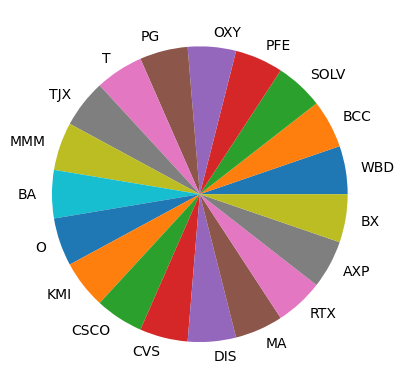

In [19]:
fig, ax = plt.subplots()
ax.pie(weights, labels=tickers)
slt.pyplot(fig)